In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def allsatsundays(start_date, end_date):
    day_sat = pd.date_range(start=start_date, end=end_date, 
                         freq='W-SAT').strftime('%Y-%m-%d').tolist()
    day_sun = pd.date_range(start=start_date, end=end_date, 
                         freq='W-SUN').strftime('%Y-%m-%d').tolist()
    days = day_sat+day_sun
    days.sort()
    return days

def allsatsundays(start_date, end_date):
    day_sat = pd.date_range(start=start_date, end=end_date, 
                         freq='W-SAT').strftime('%Y-%m-%d').tolist()
    day_sun = pd.date_range(start=start_date, end=end_date, 
                         freq='W-SUN').strftime('%Y-%m-%d').tolist()
    days = day_sat+day_sun
    days.sort()
    return days

def get_stock_market_holydays(filename, start_date, end_date):
    df = pd.read_csv(filename)
    kor_days = df['KOR'][df['KOR'].notnull()].values.tolist()
    usa_days = df['USA'][df['USA'].notnull()].values.tolist() # Nan value를 제외한 값을 리스트로 변환

    holydays = allsatsundays(start_date, end_date)
    
    kor_days = sorted(set(kor_days + holydays))
    usa_days = sorted(set(usa_days + holydays))
    
    return kor_days, usa_days

def get_seq_data(filename, holydays):
    df = pd.read_csv(filename)
    df_seq = df[~df['date'].isin(holydays)].copy()
    df_seq.dropna(subset=df.columns[1:], how='all', inplace=True)
    return df_seq

In [3]:
filename = 'https://raw.githubusercontent.com/fasthill/'\
            'factors_affecting_stock_price/main/data/stock_market_holydays/stock_market_holidays.csv'
start_date = '2020-01-01'
end_date = '2022-12-31'

kor_days, usa_days = get_stock_market_holydays(filename, start_date, end_date) # get stock market holydays

In [4]:
filename = '../data/data_hyunmotor.csv'
df = get_seq_data(filename, kor_days)

In [6]:
df.tail()

,date,retail,retail_cr,retail_days,foreigner,foreigner_cr,foreigner_days,institution,institution_cr,institution_days,...,rc4_pcr,open,high,low,close,close_cr,vol,vol_cr,high_time,low_time
922,2022-07-11,-10749.0,NaN,NaN,11123.0,NaN,NaN,-719.0,NaN,NaN,...,NaN,180000.0,182000.0,179000.0,179000.0,0.56,119200.0,NaN,NaN,NaN
923,2022-07-12,868.0,NaN,NaN,3282.0,NaN,NaN,-3835.0,NaN,NaN,...,NaN,180000.0,181500.0,177000.0,179000.0,0.00,96440.0,NaN,NaN,NaN
924,2022-07-13,-40414.0,NaN,NaN,18096.0,NaN,NaN,22755.0,NaN,NaN,...,NaN,180000.0,185000.0,178500.0,183500.0,2.51,172566.0,NaN,NaN,NaN
925,2022-07-14,13810.0,NaN,NaN,9619.0,NaN,NaN,-23410.0,NaN,NaN,...,NaN,183000.0,184500.0,180500.0,182500.0,-0.54,142369.0,NaN,NaN,NaN
926,2022-07-15,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,183000.0,184500.0,178500.0,183500.0,0.55,115240.0,NaN,NaN,NaN


In [81]:
import datetime, time
def get_20days_data(series):
    x_num = np.arange(1, 21)
    for i in range(len(series)-600):
        y = series[i:i+20]
        plt.plot(x_num, y)
        plt.show()
        time.sleep(0.3)

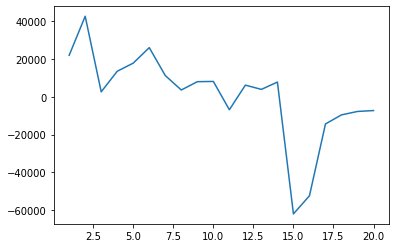

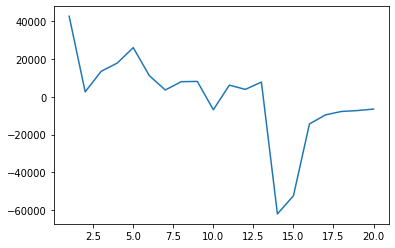

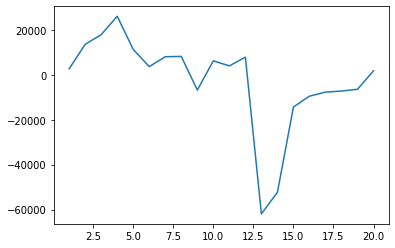

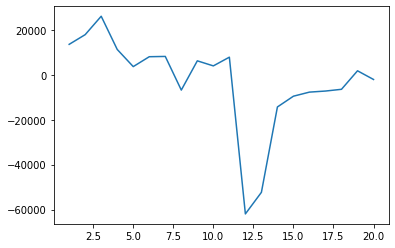

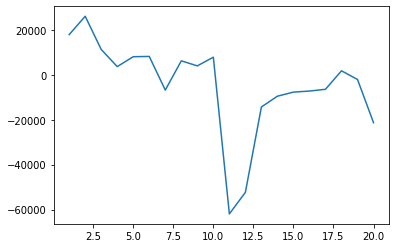

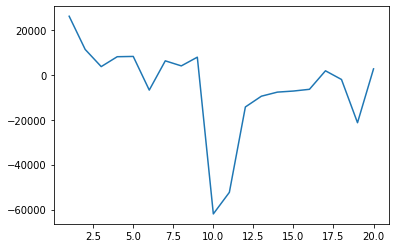

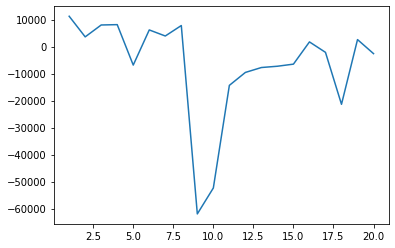

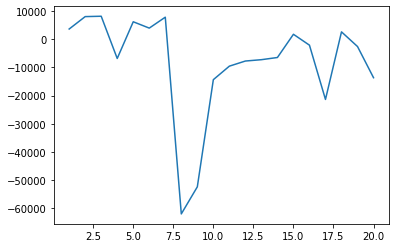

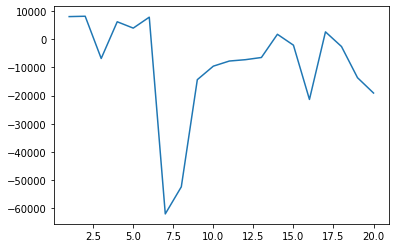

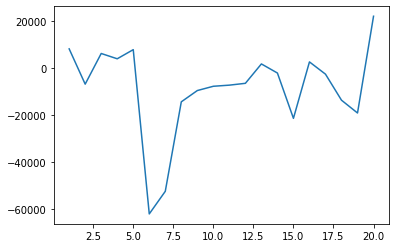

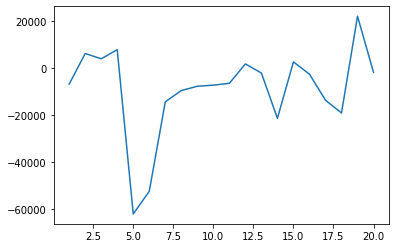

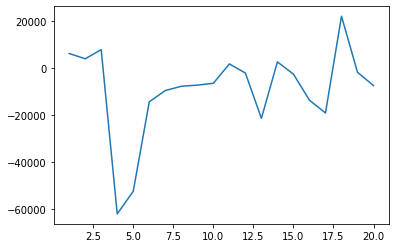

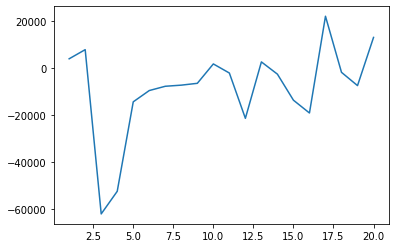

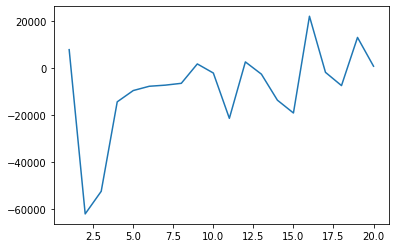

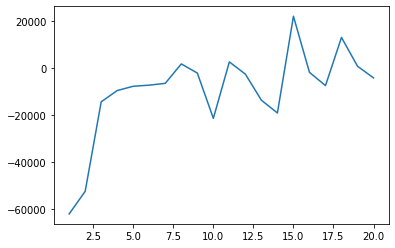

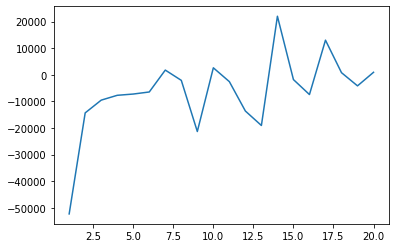

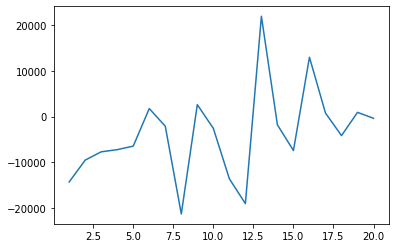

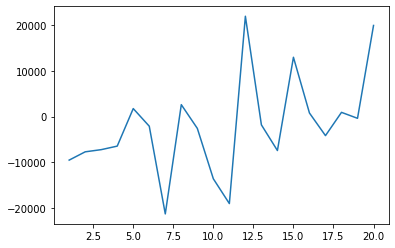

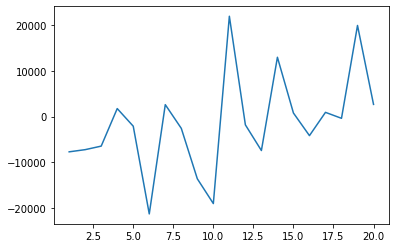

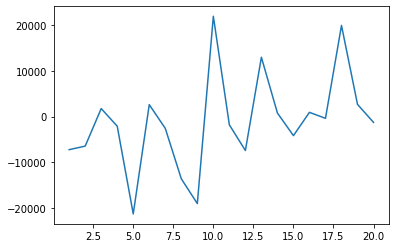

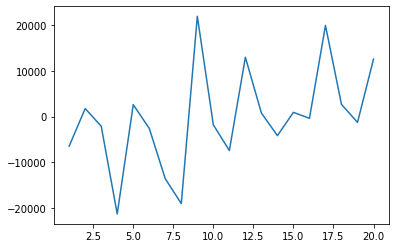

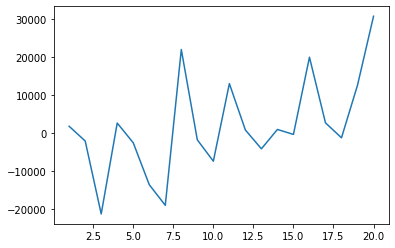

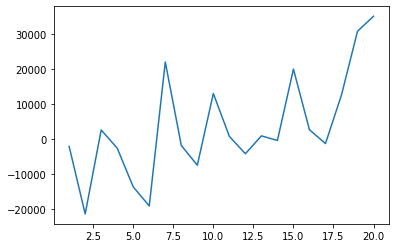

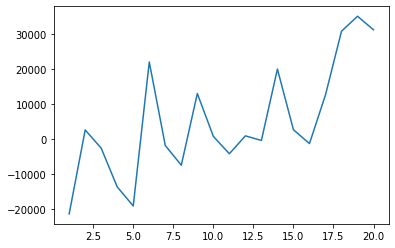

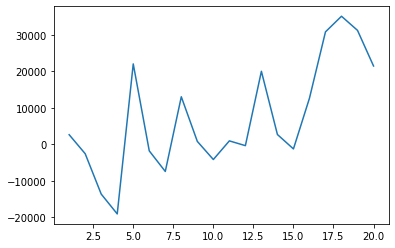

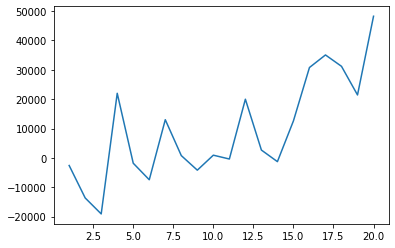

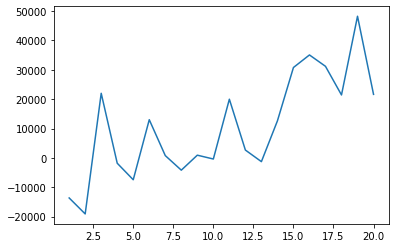

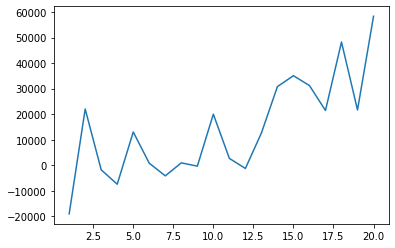

In [82]:
get_20days_data(df['retail'])

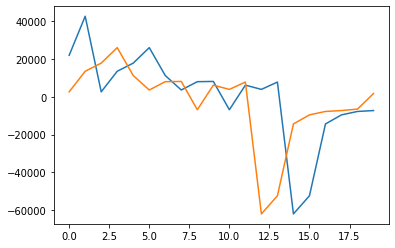

In [33]:
i=0
x = df['retail'][i:i+20]
i=2
y = df['retail'][i:i+20]
r = np.arange(20)
plt.plot(r, x)
plt.plot(r, y)

In [38]:
np.arange(1, 21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [14]:
for i in range(100-18):
    print(i, i+19)

0 19
1 20
2 21
3 22
4 23
5 24
6 25
7 26
8 27
9 28
10 29
11 30
12 31
13 32
14 33
15 34
16 35
17 36
18 37
19 38
20 39
21 40
22 41
23 42
24 43
25 44
26 45
27 46
28 47
29 48
30 49
31 50
32 51
33 52
34 53
35 54
36 55
37 56
38 57
39 58
40 59
41 60
42 61
43 62
44 63
45 64
46 65
47 66
48 67
49 68
50 69
51 70
52 71
53 72
54 73
55 74
56 75
57 76
58 77
59 78
60 79
61 80
62 81
63 82
64 83
65 84
66 85
67 86
68 87
69 88
70 89
71 90
72 91
73 92
74 93
75 94
76 95
77 96
78 97
79 98
80 99
81 100


In [ ]:
print(df.rolling(window=3).sum()) # 뒤에 추가 메서드를 이용하여 연산을 지정해주어야합니다.

In [ ]:
print(df.rolling(window=4, closed='left').sum())

In [ ]:
print(df.rolling(window=2, closed='right').sum())

In [ ]:
dict_test = {
    'col1': [1, 1, 2, 2, 3, 3, 3, 4],
    'col2': [1000, 1100, 2100, 2050, 3000, 3100, 3200, 4200],
    'col3': ['a', 'b', 'a', 'c', 'a', 'a', 'd', 'e']}

In [ ]:
df_test = pd.DataFrame(dict_test)

In [ ]:
df_test

In [ ]:
df_test[['col2']].rolling(3).sum()

In [ ]:
df_test[['col2']].rolling(3, center=True).sum()

In [ ]:
df_test.rolling(3, on= 'col2', center=True).sum()

In [ ]:
df_test[['col2']].rolling(3, min_periods=1, center=True).sum()

In [ ]:
df_test[['col2']].rolling(3, closed='left').sum()

In [ ]:
df_test[['col2']].rolling(3, closed='right').sum()

In [ ]:
df_test = df_test.groupby(by=['col1', 'col3'])['col2'].apply(list)

In [ ]:
df_test = pd.DataFrame(df_test)

In [ ]:
df_test

In [ ]:
df_test.reset_index(drop=False, inplace=True)

In [ ]:
df_test

In [ ]:
df_test.set_index(keys=['col1', 'col3'], inplace=True)

In [ ]:
df_test.reset_index(['col1'], inplace=True)